# 실습 - SVM(Support Vector Machine)



# **1. 필요한 라이브러리 불러오기**

In [1]:
# 데이터, 시각화 관련 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SVM, Iris 데이터 불러오기 관련 라이브러리
from sklearn import svm, datasets 

# **2. SVM 간단한 분류 예제**

In [2]:
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC()

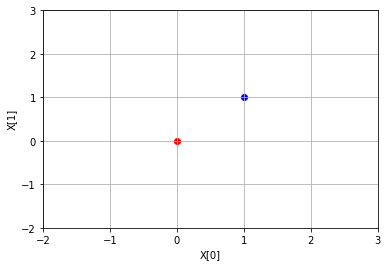

In [3]:
# 데이터 시각화
plt.scatter([0], [0], c='red')
plt.scatter([1], [1], c='blue')
# plt.scatter([-1], [-1], c='red', marker='^')
# plt.scatter([2], [2], c='blue', marker='^')
plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.grid()
plt.show()

In [ ]:
# test data 예측
clf.predict([[-1, -1]])

In [ ]:
# # test data 예측
clf.predict([[2, 2]])

In [4]:
# support vectors
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [ ]:
# support vectors의 data index
clf.support_

In [ ]:
# 클래스별 support vectors의 개수
clf.n_support_

# **3. SVC 분류 예제(Iris data)**

In [9]:
# Iris 데이터 불러오기
iris = datasets.load_iris()

# 0, 1번 꽃의 꽃받침(sepal)의 길이(length)와 너비(width)만 저장
X_iris = iris.data[:100, :2]  
y_iris = iris.target[:100]

In [ ]:
y_iris

In [11]:
# SVM regularization parameter
# 여기서 C는 수업시간의 수식의 C와 반비례 관계
C = 100.0  

# training data 적합
clf = svm.SVC(kernel='linear', C=C).fit(X_iris, y_iris)

In [ ]:
# support vectors
clf.support_vectors_

In [ ]:
# support vectors의 data index
clf.support_

In [ ]:
X_iris[clf.support_[0]]

In [ ]:
# 클래스별 support vectors의 개수
clf.n_support_

In [ ]:
# SVC 시각화

# 그림의 크기 설정
plt.figure(figsize=(8,6))

# 분류의 경계선과 배경 만들기
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X_iris[:, 0].min() - 1, X_iris[:, 0].max() + 1
y_min, y_max = X_iris[:, 1].min() - 1, X_iris[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# training data를 배경 위에 표시
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap=plt.cm.coolwarm)
# support vectors를 배경 위에 표시
for sv_idx in clf.support_:
  plt.scatter(X_iris[sv_idx][0], X_iris[sv_idx][1], c='white', marker='s')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with linear kernel')

plt.show()

# **4. SVM kernel 비교 예제(Iris data)**

In [17]:
# SVM regularization parameter
# 여기서 C는 수업시간의 수식의 C와 반비례 관계
C = 1.0 

# SVC
svc = svm.SVC(kernel='linear', C=C).fit(X_iris, y_iris)

# SVM(radial kernel)
rbf_svc = svm.SVC(kernel='rbf', gamma=1.5, C=C).fit(X_iris, y_iris)

# SVM(polynomial kernel)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_iris, y_iris)

In [ ]:
# SVC 시각화

# 그림의 크기 설정
plt.figure(figsize=(12,3))

# 분류의 경계선과 배경 만들기
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X_iris[:, 0].min() - 1, X_iris[:, 0].max() + 1
y_min, y_max = X_iris[:, 1].min() - 1, X_iris[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(1, 3, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # training data를 배경 위에 표시
    plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()